In [195]:
import pandas as pd
import os


#Read csv file + merge 12 months

In [196]:
#df = pd.read_csv("SalesAnalysis/Sales_Data/Sales_April_2019.csv")
#print(len(df))
files = [file for file in os.listdir('./SalesAnalysis/Sales_Data/')]

df_12 = pd.DataFrame()

for file in files:
    df = pd.read_csv("SalesAnalysis/Sales_Data/"+file)
    df_12 = pd.concat([df_12,df])
    
df_12.head()
#print(len(df_12))
df_12.to_csv("df_12.csv",index=False)

#Read all data  + export to Csv

In [197]:
all_data = pd.read_csv("./df_12.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#The best mont for sales? how much was earned that month? - my try

In [198]:
all_data = all_data[all_data["Quantity Ordered"].notna()] #only data with quantity ordered #still have Order date etc.
#all_data=all_data[all_data["Quantity Ordered"].type()]
#all_data.dropna() #drop NaN data
all_data.sort_values("Quantity Ordered",ascending=0)
#all_data.drop(index=170469,axis=0,inplace=False)
#all_data.sort_values("Quantity Ordered",ascending=0)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
170469,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
136723,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
109313,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
179487,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
170617,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
65431,159980,Apple Airpods Headphones,1,150,02/07/19 12:18,"491 12th St, San Francisco, CA 94016"
65432,159981,Lightning Charging Cable,1,14.95,02/02/19 19:41,"703 Lincoln St, Atlanta, GA 30301"
65433,159982,Lightning Charging Cable,1,14.95,02/27/19 10:59,"831 Madison St, Los Angeles, CA 90001"
65434,159983,Apple Airpods Headphones,1,150,02/09/19 20:55,"813 Jefferson St, San Francisco, CA 94016"


#Check amount of Quantity Ordered

In [199]:
count = 0 
for x in all_data["Quantity Ordered"]:
    if x == "Quantity Ordered":
        count+=1
print(count)

355


#Try to get rid of quantity Ordered

In [200]:
#for x in all_data["Quantity Ordered"]:
#    if x == "Quantity Ordered":
#        all_data.drop(x,axis=0,inplace = False)


In [201]:
all_data = all_data[all_data["Quantity Ordered"] != "Quantity Ordered"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#Test


In [202]:
count = 0 
for x in all_data["Quantity Ordered"]:
    if x == "Quantity Ordered":
        count+=1
print(count)

0


#Add month and total value

In [203]:
all_data["Month"]=all_data["Order Date"].str[:2] #Month
all_data["Day"] = all_data["Order Date"].str[3:5] #Day
all_data["Month"] = all_data["Month"].astype('int32') #Change type of numbers
all_data["Day"] = all_data["Day"].astype('int32') #Change type of numbers
#smooth
all_data.head()
all_data.sort_values("Price Each",ascending=1)
#all_data["Value of something"] = all_data["Price Each"] * all_data["Quantity Ordered"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day
23476,241557,20in Monitor,1,109.99,08/10/19 11:13,"403 9th St, New York City, NY 10001",8,10
142537,283972,20in Monitor,1,109.99,11/30/19 17:23,"766 Lake St, Atlanta, GA 30301",11,30
6440,182713,20in Monitor,1,109.99,04/15/19 17:15,"960 Pine St, San Francisco, CA 94016",4,15
6439,182712,20in Monitor,1,109.99,04/18/19 17:20,"986 Adams St, Los Angeles, CA 90001",4,18
142560,283994,20in Monitor,1,109.99,11/29/19 23:55,"337 Park St, Boston, MA 02215",11,29
...,...,...,...,...,...,...,...,...
41009,305790,ThinkPad Laptop,1,999.99,12/04/19 11:12,"543 Main St, Los Angeles, CA 90001",12,4
130115,203232,ThinkPad Laptop,1,999.99,05/27/19 13:57,"487 Forest St, Los Angeles, CA 90001",5,27
142750,284175,ThinkPad Laptop,1,999.99,11/21/19 20:57,"171 Hickory St, San Francisco, CA 94016",11,21
107728,164356,ThinkPad Laptop,1,999.99,03/05/19 11:41,"352 Meadow St, New York City, NY 10001",3,5


#still issue with "can't multiply sequence by non-int of type 'str'" 

In [222]:
#all_data = all_data["Quantity Ordered"]
all_data["Quantity Ordered"] = all_data["Quantity Ordered"].astype('int')
#all_data["Price Each"] = all_data["Price Each"].astype('int') #already int
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"]) #better option
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"]) #better option

all_data["Total Value"] = all_data["Quantity Ordered"]*all_data["Price Each"]
#he did all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Total Value
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,19,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,7,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,30,11.99


##Answer to question one


In [259]:
all_data.head()
#all_data.groupby("Month").sum()[Total]
all_data.groupby('Month').sum()["Total Value"].sort_values(ascending=0)

Month
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1822256.73
Name: Total Value, dtype: float64

#Visualisation of diagrams

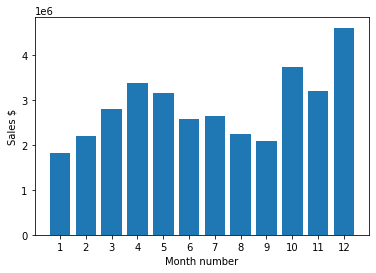

In [237]:
import matplotlib.pyplot as plt
result = all_data.groupby('Month').sum()["Total Value"]
months = range(1,13)
plt.bar(months,result)
plt.xticks(months)
plt.ylabel('Sales $')
plt.xlabel('Month number')
plt.show()

#Q2 what city had the highest number of sales


In [284]:
#all_data["First coma"] = pd.to_numeric(all_data["Purchase Address"].str.find(","))
#all_data["Second coma"] = pd.to_numeric(all_data["Purchase Address"].str.find(",",start=all_data["First coma"]+1))

all_data["City"] = all_data["Purchase Address"].apply(lambda x: x.split(',')[1])
all_data["State"] = (all_data["Purchase Address"].str[:-6]).str[-2:]
all_data["City(State)"] = all_data["City"] +"("+all_data["State"]+")"

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Total Value,First coma,Second coma,City,State,City(State)
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,19,23.90,10,NaN,Dallas,TX,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,7,99.99,15,NaN,Boston,MA,Boston(MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,600.00,13,NaN,Los Angeles,CA,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,11.99,13,NaN,Los Angeles,CA,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,30,11.99,10,NaN,Los Angeles,CA,Los Angeles(CA)


In [318]:
all_data.groupby('City(State)').sum()["Total Value"].sort_values(ascending=0)

City(State)
 San Francisco(CA)    8262203.91
 Los Angeles(CA)      5452570.80
 New York City(NY)    4664317.43
 Boston(MA)           3661642.01
 Atlanta(GA)          2795498.58
 Dallas(TX)           2767975.40
 Seattle(WA)          2747755.48
 Portland(OR)         1870732.34
 Austin(TX)           1819581.75
 Portland(ME)          449758.27
Name: Total Value, dtype: float64

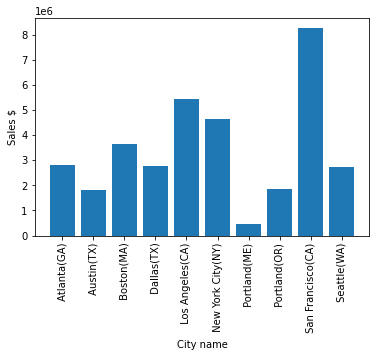

In [323]:
result = all_data.groupby('City(State)').sum()["Total Value"]
#cities = all_data['City(State)'].unique() #x/y data not in same order
cities = [city for city,df in all_data.groupby('City(State)')] # each city is added to df
#cities = result['City(State)']
#print(cities)
#print(result)
plt.bar(cities,result) 
plt.xticks(cities,rotation='vertical',size=10)
plt.ylabel('Sales $')
plt.xlabel('City name')
plt.show()

#Q3 What time should we display advertisements to maximize likelihood of cusomer's buying product?

In [324]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Total Value,First coma,Second coma,City,State,City(State)
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,19,23.90,10,NaN,Dallas,TX,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,7,99.99,15,NaN,Boston,MA,Boston(MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,600.00,13,NaN,Los Angeles,CA,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12,11.99,13,NaN,Los Angeles,CA,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,30,11.99,10,NaN,Los Angeles,CA,Los Angeles(CA)
